# Replicating Jorion (2003)
Portfolio optimization with tracking error constraints

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# benchmark weights in N asset classes
q = np.array([0.25, 0.25, 0.25, 0.25])

In [4]:
# deviations from the benchmark (have to sum to zero!)
x = np.array([-0.05, 0.1 ,-0.05, 0])

In [5]:
# portfolio asset class weights
pf = q + x

In [6]:
E = np.array([0.03, 0.1, 0.05, 0.08])

In [7]:
# define correlation matrix, and vector of risk per asset class, which is then used to get the matrix..
rho = np.array([
        [1.0   ,0.1  ,0.4, -0.2]
        ,[0.1  ,1.0  ,0.5, 0.2]
        ,[0.4  ,0.5  ,1.0, 0.6]
        ,[-0.2 ,0.2  ,0.6, 1.0]
    ])
sigma = [0.03, 0.15, 0.1, 0.08]

In [8]:
def corr2cov(sigma, corr):
    return corr * np.outer(sigma, sigma)

In [9]:
# Variance-covariance matrix
V = corr2cov(sigma, rho)

In [10]:
V

array([[ 0.0009 ,  0.00045,  0.0012 , -0.00048],
       [ 0.00045,  0.0225 ,  0.0075 ,  0.0024 ],
       [ 0.0012 ,  0.0075 ,  0.01   ,  0.0048 ],
       [-0.00048,  0.0024 ,  0.0048 ,  0.0064 ]])

In [11]:
# Expected return on the benchmark
np.dot(q, E)

0.065000000000000002

In [12]:
# absolute volatility of benchmark
np.dot(np.dot(q, V), q)

0.0044712499999999995

In [13]:
# relative return
np.dot(x, E)

0.0060000000000000019

In [14]:
# Tracking error
np.dot(np.dot(x, V), x)

0.00017875000000000001

In [15]:
# actual portfolio return
np.dot(pf, E)

0.070999999999999994

In [16]:
# actual portfolio risk
np.dot(np.dot(pf, V), pf)

0.0056532500000000003

In [17]:
# alternative, expanded version of the portfolio risk calculation
np.dot(np.dot(q, V), q) + 2 * np.dot(np.dot(q, V), x) + np.dot(np.dot(x, V), x)

0.0056532499999999994

In [18]:
# Check that the benchmark weights sum to 1
np.dot(q, np.ones(q.size)) == 1

True

In [19]:
# Check that the deviations weights sum to 0
np.dot(x, np.ones(x.size)) == 0

True

In [20]:
def portfolio_return(weights, expected_returns):
    return np.dot(weights, expected_returns)

In [21]:
def portfolio_variance(weights, covar_matrix):
    return np.dot(np.dot(weights, covar_matrix), weights)

In [22]:
from scipy.optimize import minimize

In [23]:
# Try one version where we set up the constrained minimization in python
def optim_port1(target_return):
    cons = ({'type'  : 'eq','fun' : lambda x: np.dot(x, np.ones(x.size)) - 1}
            #,{'type' : 'ineq','fun' : lambda x: min(x)}
            ,{'type' : 'eq', 'fun' : lambda x: portfolio_return(x, E) - target_return}
    )
    
    myPort = minimize(portfolio_variance, [0.25, 0.25, 0.25, 0.25], args = V
                  ,method = "SLSQP", constraints = cons, tol = 1e-9)
    
    wgt = myPort['x']
    return {'weight' : wgt
            ,'ret' : portfolio_return(wgt, E)
            ,'risk' : np.sqrt(portfolio_variance(wgt, V))
           } 

In [24]:
steps = np.linspace(0, 0.15)

In [25]:
res = [optim_port1(x) for x in steps]

In [26]:
mvo = pd.DataFrame({
        'return' : [x['ret'] for x in res]
        ,'risk' : [x['risk'] for x in res]})

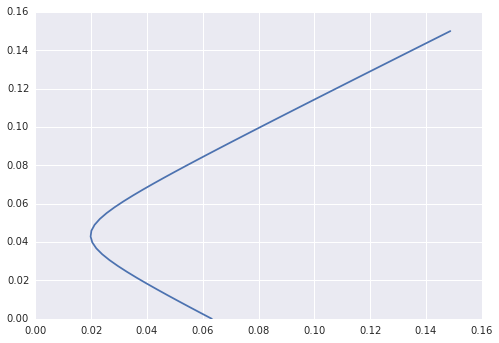

In [27]:
plt.plot(mvo['risk'], mvo['return'])

In [28]:
optim_port1(0.09)

{'ret': 0.090000000098693952,
 'risk': 0.067396495859372463,
 'weight': array([ 0.34976184,  0.35695578, -0.67829921,  0.97158159])}

In [29]:
# then create one version of the code where we use the actual closed-form solutions which have been devised

In [31]:
import cvxopt

ImportError: No module named cvxopt